In [1]:
#import data into pandas dataframe

#add matplot lib inline magic command
%matplotlib inline

#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#read csv files into dataframe
city_data_df=pd.read_csv("Resources/city_data.csv")
ride_data_df=pd.read_csv("Resources/ride_data.csv")


In [2]:
#merge dataframes

#before merging, the dataframes need to be inspected to ensure there is no incorrect data

#city_data_df
#get all rows that are not null
city_data_df.count()
city_data_df.isnull().sum()

#make sure driver_count column in the city_data_df has an integer data type
#gets Data Type (dtype) for only the driver_count column:
#city_data_df["driver_count"].dtypes
#gets data types for all columns
city_data_df.dtypes

#find out how many data points there are for each type of city
city_types=city_data_df["type"].unique()
print(city_types)
city_type_size={}
for itype in city_types:
    city_type_size[itype]=sum(city_data_df["type"]==itype)
city_type_size

['Urban' 'Suburban' 'Rural']


{'Urban': 66, 'Suburban': 36, 'Rural': 18}

In [3]:
#inspect ride data dataframe
#get rows that contain null values
ride_data_df.isnull().sum()

#make sure the fare and ride id columns are numberical data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [4]:
#merge the dataframes. both data frames contain a city column, so merge them on city

#combine data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#display dataframe
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [5]:
#merge the dataframes. both data frames contain a city column, so merge them on city

#combine data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#display dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
#create bubble chart that shows avg fare vs total number of rides, 
#with bubble size being the average number of drivers for each city type

#Create the Urban city Dataframe
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

#create subrubad city dataframe
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]

#create rural city df
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [7]:
#total number of rides from each city in each city type
urban_ride_count=urban_cities_df.groupby("city").count()["ride_id"]

suburban_ride_count=suburban_cities_df.groupby("city").count()["ride_id"]

rural_ride_count=rural_cities_df.groupby("city").count()["ride_id"]



In [8]:
#calculate the average city fare for each city type

urban_avg_fare=urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare=rural_cities_df.groupby("city").mean()["fare"]

In [9]:
#average number of drivers for each city type
urban_driver_count=urban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby("city").mean()["driver_count"]


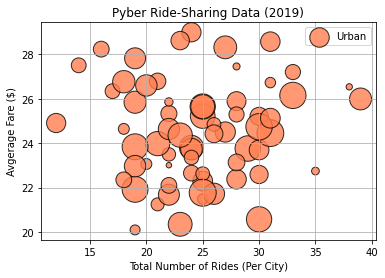

In [10]:
#plt.plot(urban_ride_count, urban_avg_fare, "o", markersize=urban_driver_count)
#build scatter plot for urban cities
plt.scatter(
    urban_ride_count, urban_avg_fare, label="Urban", 
    s=[i*10 for i in urban_driver_count], edgecolor="black", linewidth=1, 
    alpha=0.8, color="coral")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avgerage Fare ($)")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)

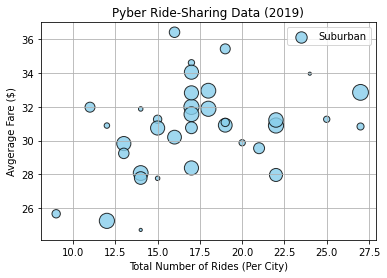

In [13]:
#build scatter plot for surburban cities
plt.scatter(
    suburban_ride_count, suburban_avg_fare, label="Suburban", 
    s=[i*10 for i in suburban_driver_count], edgecolor="black", linewidth=1, 
    alpha=0.8, color="skyblue")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avgerage Fare ($)")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)


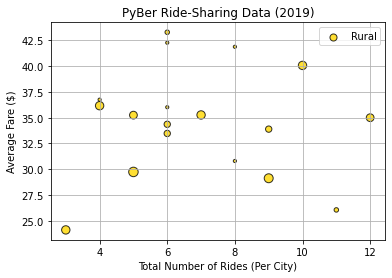

In [14]:
# Build the scatter plots for suburban cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

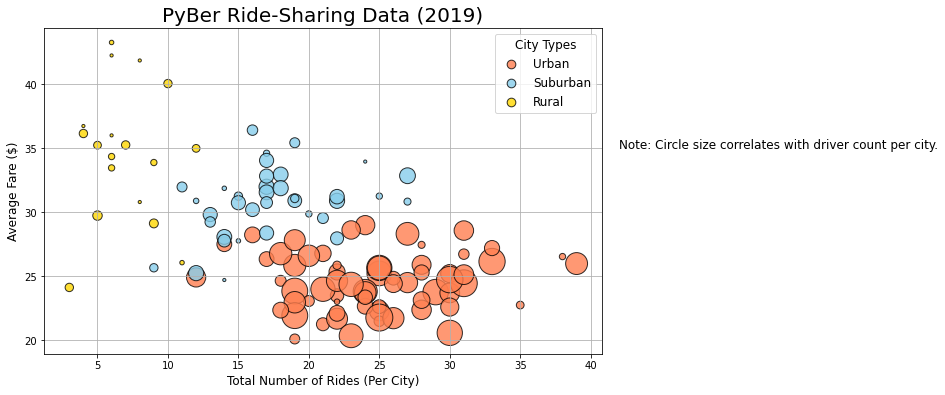

<Figure size 432x288 with 0 Axes>

In [28]:
#put all scatter plots onto one figure
plt.subplots(figsize=(10, 6))

#Urban
plt.scatter(
    urban_ride_count, urban_avg_fare, label="Urban", 
    s=[i*10 for i in urban_driver_count], edgecolor="black", linewidth=1, 
    alpha=0.8, color="coral")

#Suburban
plt.scatter(
    suburban_ride_count, suburban_avg_fare, label="Suburban", 
    s=[i*10 for i in suburban_driver_count], edgecolor="black", linewidth=1, 
    alpha=0.8, color="skyblue")

#Rural
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

#Add title and axes labels
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)

#Add grid
plt.grid(True)

# Add the legend. and format legend
lgnd=plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
#plt.legend()

#Add note to right of the chart. 42 is the x coordinate, 35 is the y coordinate for where the textbox will be (based on chart axes)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#display
plt.show()

#save the figure
plt.savefig("analysis/Fig1.png")